In [1]:
pip install dask

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [45]:
import dask.dataframe as dd
import pandas as pd
import sqlite3
import psycopg2
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt1
import seaborn as sns
import numpy as np
from datetime import datetime


In [46]:
#creates a connection to the database
con = sqlite3.connect('C:\\Users\\con05838\\OneDrive - ONE Gas INC\\Desktop\\DataScienceClass\\SQL\\SQLChallenges\\SQLCHallenges')

In [47]:
df = pd.read_sql_query("SELECT \
DR_NO, \
Date_Rptd \
AREA, \
AREA_NAME, \
Crm_Cd, \
Crm_Cd_Desc, \
Vict_Age, \
Vict_Sex, \
Vict_Descent, \
Premis_Cd, \
Premis_Desc, \
Weapon_Used_Cd, \
Weapon_Desc, \
LAT, \
LON \
from Crime_Data_from cdf " ,con)

In [62]:
df.isnull().sum().sum()

0

In [49]:
df.dtypes

DR_NO               int64
AREA               object
AREA_NAME          object
Crm_Cd              int64
Crm_Cd_Desc        object
Vict_Age            int64
Vict_Sex           object
Vict_Descent       object
Premis_Cd          object
Premis_Desc        object
Weapon_Used_Cd     object
Weapon_Desc        object
LAT               float64
LON               float64
dtype: object

In [50]:
#creates a new column called time by converting AREA columns to a date time data type
df['time']= df[["AREA"]].apply(pd.to_datetime)

In [51]:
df.dtypes

DR_NO                      int64
AREA                      object
AREA_NAME                 object
Crm_Cd                     int64
Crm_Cd_Desc               object
Vict_Age                   int64
Vict_Sex                  object
Vict_Descent              object
Premis_Cd                 object
Premis_Desc               object
Weapon_Used_Cd            object
Weapon_Desc               object
LAT                      float64
LON                      float64
time              datetime64[ns]
dtype: object

In [52]:
#drops the AREA column since we created a  converted data type column for AREA called time
df1=df.drop(['AREA'], axis=1)

In [53]:
#creates a new columns and converts  Vict_Sex to fully spelled out gender names
df1.loc[df['Vict_Sex'] == 'M', 'Gender'] = 'Male' 
df1.loc[df['Vict_Sex'] == 'F', 'Gender'] = 'Female' 
df1.loc[df['Vict_Sex'] == 'X', 'Gender'] = 'UNKNOWN' 
df1.loc[df['Vict_Sex'] == '', 'Gender'] = 'UNKNOWN'

In [54]:
#drops the vict_sex table since we created a fully spelled out version before.
df1.drop(['Vict_Sex'], axis=1)

,DR_NO,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon_Desc,LAT,LON,time,Gender
0,10304468,Southwest,624,BATTERY - SIMPLE ASSAULT,36,B,501,SINGLE FAMILY DWELLING,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0141,-118.2978,2020-01-08,Female
1,190101086,Central,624,BATTERY - SIMPLE ASSAULT,25,H,102,SIDEWALK,500,UNKNOWN WEAPON/OTHER WEAPON,34.0459,-118.2545,2020-01-02,Male
2,200110444,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,726,POLICE FACILITY,,,34.0448,-118.2474,2020-04-14,UNKNOWN
3,191501505,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",,,34.1685,-118.4019,2020-01-01,Female
4,191921269,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,409,BEAUTY SUPPLY STORE,,,34.2198,-118.4468,2020-01-01,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668876,231405429,Pacific,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,402,MARKET,,,33.9846,-118.4428,2023-02-05,UNKNOWN
668877,231104474,Northeast,440,THEFT PLAIN - PETTY ($950 & UNDER),42,W,101,STREET,,,34.1214,-118.1915,2023-01-12,Male
668878,230804266,West LA,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,O,717,HEALTH SPA/GYM,,,34.0611,-118.4184,2023-01-08,Male
668879,230107318,Central,624,BATTERY - SIMPLE ASSAULT,58,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0453,-118.2499,2023-02-19,Female


In [55]:
df1['Weapon_Used_Cd'] = df1.Weapon_Used_Cd.fillna('UNKNOWN/Unused')

In [57]:
df1.loc[df['Vict_Descent'] == 'B', 'Race'] = 'Black' 
df1.loc[df['Vict_Descent'] == 'W', 'Race'] = 'White' 
df1.loc[df['Vict_Descent'] == 'H', 'Race'] = 'Hispanic' 
df1.loc[df['Vict_Descent'] == 'O', 'Race'] = 'Other'
df1.loc[df['Vict_Descent'] == 'X', 'Race'] = 'UNKNOWN'

In [59]:
#drops the AREA column since we created a  converted data type column for AREA called time
df2=df1.drop(['Vict_Descent'], axis=1)

In [ ]:
df2['Age_Demo'] = np.where((df['Revenue']>0.1)& (df['Revenue'] <= 14.99),'below average',
                   np.where((df['Revenue'] >= 15)&(df['Revenue'] <= 15.99), 'Average',
                   np.where(df['Revenue']>= 16, 'Above Average', 'No Sale')))

In [128]:
df2
df2.to_csv('MainFile', index = True)

In [109]:
Most_common_crime_location = df2.groupby(['Premis_Desc'])['DR_NO'].count().nlargest(10).reset_index()



In [126]:
#export 
Most_common_crime_location

Most_common_crime_location.to_csv('Most_common_crime_location.csv', index = True)

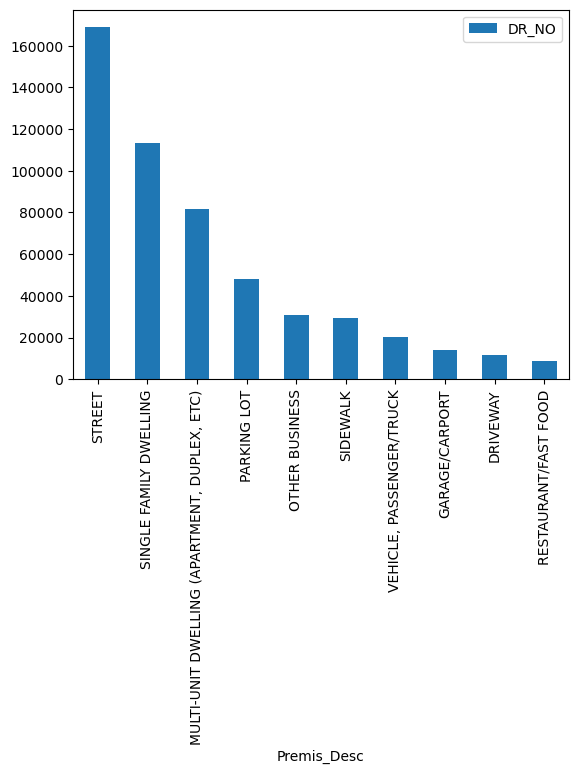

In [124]:
#most common crime location
Most_common_crime_location.plot(x="Premis_Desc", y=['DR_NO'], kind="bar")
plt.savefig('Chart1.pdf')

In [121]:


average_age_of_victm_per_crime = df2.groupby(['Gender'])['Vict_Age'].mean().reset_index()

In [125]:
#export

average_age_of_victm_per_crime
average_age_of_victm_per_crime.to_csv('average_age_of_victm_per_crime.csv', index = True)

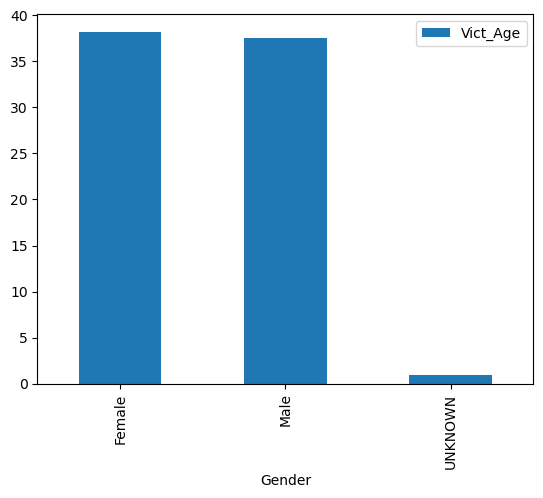

In [123]:
average_age_of_victm_per_crime.plot(x="Gender", y=['Vict_Age'], kind="bar")
plt.savefig('Chart2.pdf')